<a href="https://colab.research.google.com/github/szh141/colab/blob/main/iSIM_resolution_double.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import data
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage as ndi

<ipython-input-2-6af34f9efe0c>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


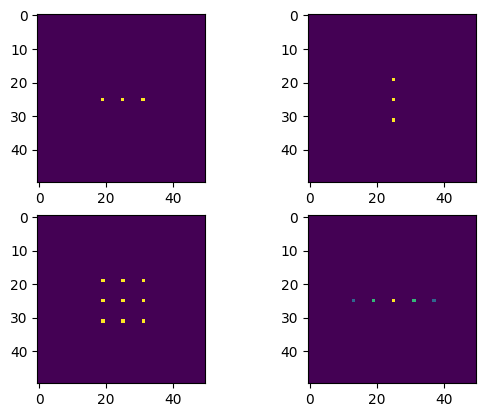

In [2]:
test_h = np.zeros((50,50))
test_h[25,25] = 1
test_h[25,19] = 1
test_h[25,31] = 1
plt.imshow(test_h)

test_v = np.zeros((50,50))
test_v[25,25] = 1
test_v[19,25] = 1
test_v[31,25] = 1

test_h_v = ndi.convolve(test_h,test_v)
test_h_h = ndi.convolve(test_h,test_h)

plt.subplot(221)
plt.imshow(test_h)

plt.subplot(222)
plt.imshow(test_v)

plt.subplot(223)
plt.imshow(test_h_v)

plt.subplot(224)
plt.imshow(test_h_h)

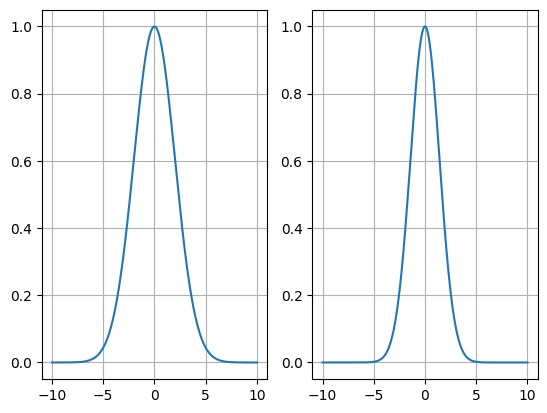

In [22]:
x_values = np.linspace(-10,10,1000)

"""
FWHM = 2.35*sigma
sigma = 2 # make 2 represent 200nm, so resolution of FWHM is 235nm

"""


"""
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )
"""

def gaussian(x, A, mu, sig):
    return (
        A * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

psf = gaussian(x_values, 1, 0, 2)

plt.subplot(121)
plt.plot(x_values,psf)
plt.grid()
plt.subplot(122)
plt.plot(x_values,psf*psf)
plt.grid()

In [45]:
from scipy.optimize import curve_fit

coeff_1, var_matrix_2 = curve_fit(gaussian,x_values,psf)
coeff_2, var_matrix_2 = curve_fit(gaussian,x_values,psf*psf)

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean of psf = ', coeff_1[1])
print('Fitted standard deviation of psf= ', coeff_1[2])
print('=======================================')
print('Fitted mean of psf square = ', coeff_2[1])
print('Fitted standard deviation of psf square= ', coeff_2[2])
print('=======================================')
print('lateral resolution improvment is ',coeff_1[2]/coeff_2[2],' fold or sqrt 2')


Fitted mean of psf =  -8.960240172583938e-09
Fitted standard deviation of psf=  1.9999999997833127
Fitted mean of psf square =  -2.5841084969437335e-09
Fitted standard deviation of psf square=  1.4142135623870455
lateral resolution improvment is  1.4142135622059235  fold or sqrt 2


In [33]:
# example to fit 1D gaussian

import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define some test data which is close to Gaussian
psf

hist, bin_edges = numpy.histogram(psf, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

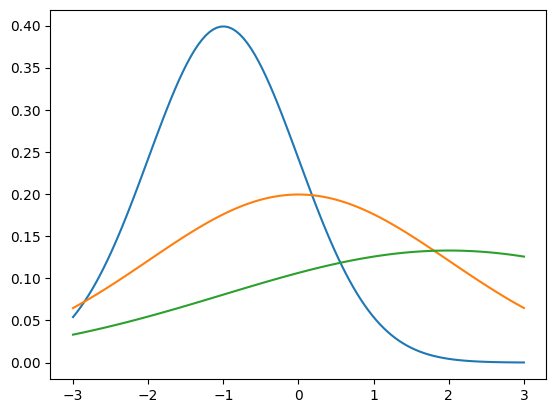

In [4]:
# example to draw gaussian

def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

x_values = np.linspace(-3, 3, 120)
for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    plt.plot(x_values, gaussian(x_values, mu, sig))

plt.show()

Fitted mean =  0.025578634747743235
Fitted standard deviation =  1.0196612566435148


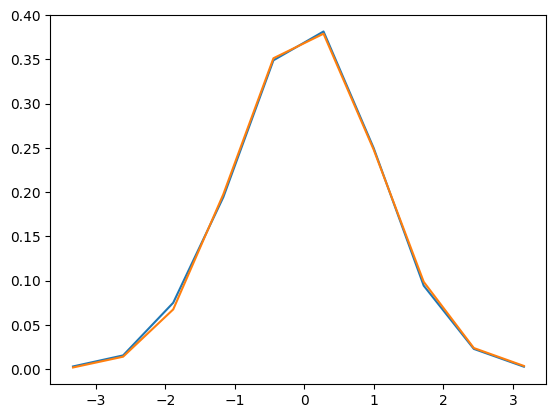

In [18]:
# example to fit 1D gaussian

import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define some test data which is close to Gaussian
data = numpy.random.normal(size=10000)

hist, bin_edges = numpy.histogram(data, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])

plt.show()